### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук
#### Кафедра информационных технологий

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 5


### Дисциплина: Методы машинного обучения

##### Студент:  Кузнецов Юрий Владимирович

##### Группа:   НФИбд 01-20

## Москва 2023
***

Вариант 16

1. Считайте котировки акции с указанным ниже тикером за 2018-2019 год:
MDB Mongodb Inc Cl A

2. Показатель акции: дневная доходность, способ визуализации – диаграмма размаха

3. Прогнозирование стоимости акции через 12 дней по данным за предыдущие 25 дней.

4. Показатель качества R2

5. Техника борьбы с исчезающими градиентами: Функция активации без насыщения

### Задание:

В соответствии с индивидуальным заданием, указанным в записной книжке команды, выполните следующие работы:  

1. При помощи модуля pandas_datareader считайте котировки указанной в индивидуальным задании акции за указанный период времени.
2. Визуализируйте котировки акции (столбец `Adj Close`) за весь период на графике. Подпишите оси и рисунок.
3. Вычислите и визуализируйте заданный показатель акции в соответствии с индивидуальным заданием.  
4. Сформируйте обучающую, тестовую и валидационные выборки для обучения нейронной сети в соответствии с индивидуальным заданием.  
5. Постройте нейронную сеть MLP с нормализующим слоем и одним плотным скрытым слоем из 16 нейронов для прогнозирования стоимости акции и обучите ее на обучающей выборке. Оцените качество прогнозирования при помощи заданного показателя качества на тестовой выборке.
6. Примените указанную в индивидуальном задании технику решения проблемы исчезающих градиентов и постройте нейронную сеть MLP с нормализующим слоем и тремя плотными скрытыми слоями из 16 нейронов для прогнозирования стоимости акции и обучите ее на обучающей выборке. Оцените качество прогнозирования при помощи заданного показателя качества для тестовой выборки.
7. Постройте рекуррентную нейронную сеть с нормализующим слоем и одним скрытым слоем LSTM из 16 нейронов для прогнозирования стоимости акции и обучите ее на обучающей выборке. Оцените качество прогнозирования при помощи заданного показателя качества на тестовой выборке.
8. Визуализируйте кривые обучения для трех построенных моделей на одном рисунке в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду. Используйте для визуализации относительную ошибку (ошибку обучения, деленную на начальную ошибку на первой эпохе).  
9. Визуализируйте весь набор данных и прогнозы трех построенных моделей для обучающей и тестовой выборок на одном рисунке (ось X – даты, ось Y – стоимость акции), подписывая оси и рисунок и создавая легенду.  

# Решение

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from sklearn.metrics import mean_squared_error

In [ ]:
from pandas_datareader import data as pdr
import yfinance as yfin
import datetime as dt

yfin.pdr_override()

**1.** Загрузим котировки акции компании DIS Walt Disney Company за 2020 и 2021 года:

In [ ]:
data = pdr.get_data_yahoo('MDB',
                          start=dt.datetime(2018, 1, 1),
                          end=dt.datetime(2019, 12, 31))
data = data.dropna()
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,29.930000,30.080,28.855000,29.250000,29.250000,231600
2018-01-03,29.309999,29.420,28.940001,29.150000,29.150000,256700
2018-01-04,29.290001,29.490,28.900000,29.049999,29.049999,198900
2018-01-05,29.090000,29.135,28.590000,29.049999,29.049999,205600
2018-01-08,29.090000,29.090,28.209999,28.809999,28.809999,205400


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,130.750000,133.289993,130.110001,132.360001,132.360001,641700
2019-12-24,132.389999,133.078995,130.473999,132.550003,132.550003,501100
2019-12-26,132.919998,137.442993,132.309998,135.020004,135.020004,705900
2019-12-27,135.520004,135.850006,132.630005,134.130005,134.130005,441100
2019-12-30,133.880005,134.660004,128.453003,128.929993,128.929993,904800


**2.** Визуализируем котировки акции (столбец Adj Close) за весь период на графике:

<Axes: title={'center': 'Котировки акций компании MDB за 2018-2019 гг.'}, xlabel='Date', ylabel='Price'>

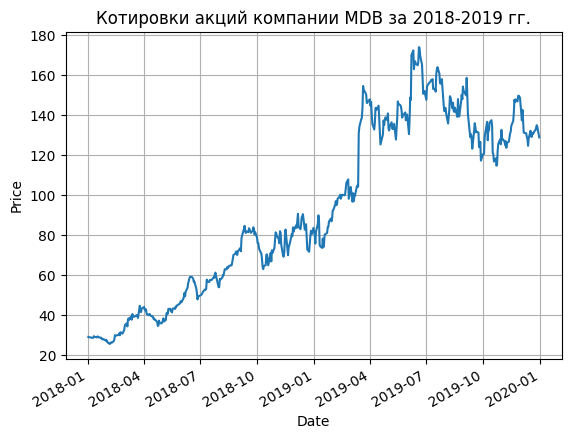

In [ ]:
data['Adj Close'].plot.line(grid=True,title='Котировки акций компании MDB за 2018-2019 гг.', ylabel="Price")

**3.** Вычислим и визуализируем дневной доход с помощью диаграммы размаха:

Text(0, 0.5, 'quantity')

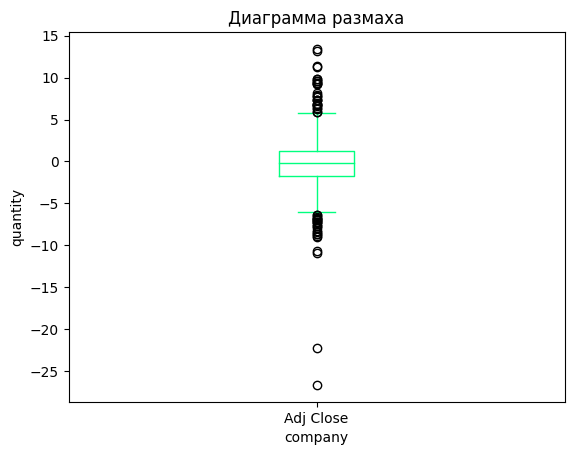

In [ ]:
(data[['Adj Close']].shift(1) - data[['Adj Close']]).plot.box(color='springgreen');
plt.title('Диаграмма размаха')
plt.xlabel('company')
plt.ylabel('quantity')

**4.** Сформируем обучающую, тестовую и валидационные выборки для обучения нейронной сети:

In [ ]:
num_train_samples = int(0.5 * len(data))
num_val_samples = int(0.25 * len(data))
num_test_samples = len(data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 251
num_val_samples: 125
num_test_samples: 126


In [ ]:
sampling_rate = 1
sequence_length = 25
delay = sampling_rate * (sequence_length + 12 - 1)
batch_size = 64

train_dataset = tf.keras.utils.timeseries_dataset_from_array(
    data[:-delay],
    targets=data['Adj Close'][delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples - delay)

val_dataset = tf.keras.utils.timeseries_dataset_from_array(
    data[:-delay],
    targets=data['Adj Close'][delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples - delay,
    end_index=num_train_samples + num_val_samples - delay)

test_dataset = tf.keras.utils.timeseries_dataset_from_array(
    data[:-delay],
    targets=data['Adj Close'][delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples - delay)

**5.** Построим нейронную сеть MLP с нормализующим слоем и одним плотным скрытым слоем из 16 нейронов для прогнозирования стоимости акции и обучим ее на обучающей выборке:

In [ ]:
X = data
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(sequence_length, data.shape[-1]))
feature_normalizer.adapt(X)

In [ ]:
inputs = tf.keras.Input(shape=(sequence_length, data.shape[-1]))
x = tf.keras.layers.Flatten()(inputs)
x = feature_normalizer(x)
x = tf.keras.layers.Dense(16, activation="relu")(x)
outputs = tf.keras.layers.Dense(1)(x)
model1 = tf.keras.Model(inputs, outputs)

model1.compile(optimizer="rmsprop", loss="mse", metrics=["mse"])
history1 = model1.fit(train_dataset,
                    epochs=20,
                    validation_data=val_dataset,

                   )

Epoch 1/20
3/3 [==============================] - 1s 145ms/step - loss: 3442.4109 - mse: 3442.4109 - val_loss: 13904.2236 - val_mse: 13904.2236
Epoch 2/20
3/3 [==============================] - 0s 30ms/step - loss: 3327.4458 - mse: 3327.4458 - val_loss: 13639.2402 - val_mse: 13639.2402
Epoch 3/20
3/3 [==============================] - 0s 38ms/step - loss: 3230.6184 - mse: 3230.6184 - val_loss: 13409.0957 - val_mse: 13409.0957
Epoch 4/20
3/3 [==============================] - 0s 30ms/step - loss: 3148.3862 - mse: 3148.3862 - val_loss: 13198.3574 - val_mse: 13198.3574
Epoch 5/20
3/3 [==============================] - 0s 31ms/step - loss: 3073.7739 - mse: 3073.7739 - val_loss: 12994.5449 - val_mse: 12994.5449
Epoch 6/20
3/3 [==============================] - 0s 32ms/step - loss: 3003.4800 - mse: 3003.4800 - val_loss: 12798.6992 - val_mse: 12798.6992
Epoch 7/20
3/3 [==============================] - 0s 39ms/step - loss: 2935.7451 - mse: 2935.7451 - val_loss: 12605.2471 - val_mse: 12605.247

Оценим качество прогнозирования при помощи RMSE на тестовой выборке:

In [ ]:
print(test_dataset)

<_BatchDataset element_spec=(TensorSpec(shape=(None, None, 6), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


In [ ]:
print(val_dataset)

<_BatchDataset element_spec=(TensorSpec(shape=(None, None, 6), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


In [ ]:
import numpy as np
from sklearn.metrics import r2_score

# Assuming you have predictions and actual values for the test set
y_pred = model1.predict(test_dataset)
y_true = np.array(data['Adj Close'][delay + num_train_samples + num_val_samples:])




2/2 [==============================] - 0s 6ms/step


In [ ]:
print(len(y_pred), len(y_true))

102 90


In [ ]:
y_pred = y_pred[:len(y_true)]


In [ ]:
r2 = r2_score(y_true, y_pred)
print("R2 Score:", r2)

R2 Score: -138.44711197535537


**Из отрицательного значения R2 видим, что модель неадекватна для предсказания данных или что данные имеют очень низкую структуру и не могут быть эффективно моделированы.**

In [ ]:
print(f"MSE на тестовом наборе: {model1.evaluate(test_dataset)[1]:.2f}")

2/2 [==============================] - 0s 13ms/step - loss: 14052.8574 - mse: 14052.8574
MSE на тестовом наборе: 14052.86


**6.** Применим функцию активации без насыщения для решения проблемы исчезающих градиентов и построим нейронную сеть MLP с нормализующим слоем и тремя плотными скрытыми слоями из 16 нейронов для прогнозирования стоимости акции и обучим ее на обучающей выборке.



In [ ]:
inputs = tf.keras.Input(shape=(sequence_length, data.shape[-1]))
x = tf.keras.layers.Flatten()(inputs)
x = feature_normalizer(x)
x = tf.keras.layers.Dense(16, activation="relu")(x)
x = tf.keras.layers.Activation(tf.keras.activations.linear)(x)  # Функция активации без насыщения
outputs = tf.keras.layers.Dense(1)(x)
model2 = tf.keras.Model(inputs, outputs)

model2.compile(optimizer="rmsprop", loss="mse", metrics=["mse"])
history2 = model2.fit(train_dataset,
                      epochs=20,
                      validation_data=val_dataset)


Epoch 1/20
3/3 [==============================] - 2s 213ms/step - loss: 3341.9753 - mse: 3341.9753 - val_loss: 13597.9658 - val_mse: 13597.9658
Epoch 2/20
3/3 [==============================] - 0s 86ms/step - loss: 3208.7021 - mse: 3208.7021 - val_loss: 13299.3066 - val_mse: 13299.3066
Epoch 3/20
3/3 [==============================] - 0s 88ms/step - loss: 3102.6763 - mse: 3102.6763 - val_loss: 13041.7119 - val_mse: 13041.7119
Epoch 4/20
3/3 [==============================] - 0s 83ms/step - loss: 3012.0479 - mse: 3012.0479 - val_loss: 12811.6240 - val_mse: 12811.6240
Epoch 5/20
3/3 [==============================] - 0s 64ms/step - loss: 2932.4829 - mse: 2932.4829 - val_loss: 12597.0928 - val_mse: 12597.0928
Epoch 6/20
3/3 [==============================] - 0s 57ms/step - loss: 2859.6868 - mse: 2859.6868 - val_loss: 12393.0977 - val_mse: 12393.0977
Epoch 7/20
3/3 [==============================] - 0s 50ms/step - loss: 2790.8926 - mse: 2790.8926 - val_loss: 12197.4277 - val_mse: 12197.427

Оценим качество прогнозирования при помощи MSE на тестовой выборке:

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

# Assuming you have predictions and actual values for the test set
y_pred = model2.predict(test_dataset)
y_true = np.array(data['Adj Close'][delay + num_train_samples + num_val_samples:])

y_pred = y_pred[:len(y_true)]

r2 = r2_score(y_true, y_pred)
print("R2 Score:", r2)

2/2 [==============================] - 0s 6ms/step
R2 Score: -134.26935169828522


In [ ]:
print(f"MSE на тестовом наборе: {model2.evaluate(test_dataset)[1]:.2f}")

2/2 [==============================] - 0s 7ms/step - loss: 13634.5781 - mse: 13634.5781
MSE на тестовом наборе: 13634.58


**7.** Построим рекуррентную нейронную сеть с нормализующим слоем и одним скрытым слоем LSTM из 16 нейронов для прогнозирования стоимости акции и обучим ее на обучающей выборке:

In [ ]:
inputs = tf.keras.Input(shape=(sequence_length, data.shape[-1]))
x = feature_normalizer(inputs)
x = tf.keras.layers.LSTM(16, activation="relu")(x)
outputs = tf.keras.layers.Dense(1)(x)
model3 = tf.keras.Model(inputs, outputs)

model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse", metrics=["mse"])
history3 = model3.fit(train_dataset,
                    epochs=20,
                    validation_data=val_dataset,

                   )

Epoch 1/20
3/3 [==============================] - 4s 151ms/step - loss: 3467.1118 - mse: 3467.1118 - val_loss: 14178.2119 - val_mse: 14178.2119
Epoch 2/20
3/3 [==============================] - 0s 39ms/step - loss: 3460.8867 - mse: 3460.8867 - val_loss: 14158.9209 - val_mse: 14158.9209
Epoch 3/20
3/3 [==============================] - 0s 39ms/step - loss: 3454.2915 - mse: 3454.2915 - val_loss: 14138.2129 - val_mse: 14138.2129
Epoch 4/20
3/3 [==============================] - 0s 46ms/step - loss: 3447.1978 - mse: 3447.1978 - val_loss: 14115.7031 - val_mse: 14115.7031
Epoch 5/20
3/3 [==============================] - 0s 41ms/step - loss: 3439.6433 - mse: 3439.6433 - val_loss: 14090.6982 - val_mse: 14090.6982
Epoch 6/20
3/3 [==============================] - 0s 40ms/step - loss: 3431.2839 - mse: 3431.2839 - val_loss: 14062.3232 - val_mse: 14062.3232
Epoch 7/20
3/3 [==============================] - 0s 48ms/step - loss: 3422.1509 - mse: 3422.1509 - val_loss: 14029.0273 - val_mse: 14029.027

Оценим качество прогнозирования при помощи MSE на тестовой выборке:

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

y_pred = model3.predict(test_dataset)
y_true = np.array(data['Adj Close'][delay + num_train_samples + num_val_samples:])

y_pred = y_pred[:len(y_true)]

r2 = r2_score(y_true, y_pred)
print("R2 Score:", r2)

2/2 [==============================] - 0s 12ms/step
R2 Score: -27.292441624583454


In [ ]:
print(f"Test MSE: {model3.evaluate(test_dataset)[1]:.2f}")

2/2 [==============================] - 0s 10ms/step - loss: 2856.1838 - mse: 2856.1838
Test MSE: 2856.18


**8.** Визуализируем кривые обучения для трех построенных моделей на одном рисунке в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду. Используем для визуализации относительную ошибку:

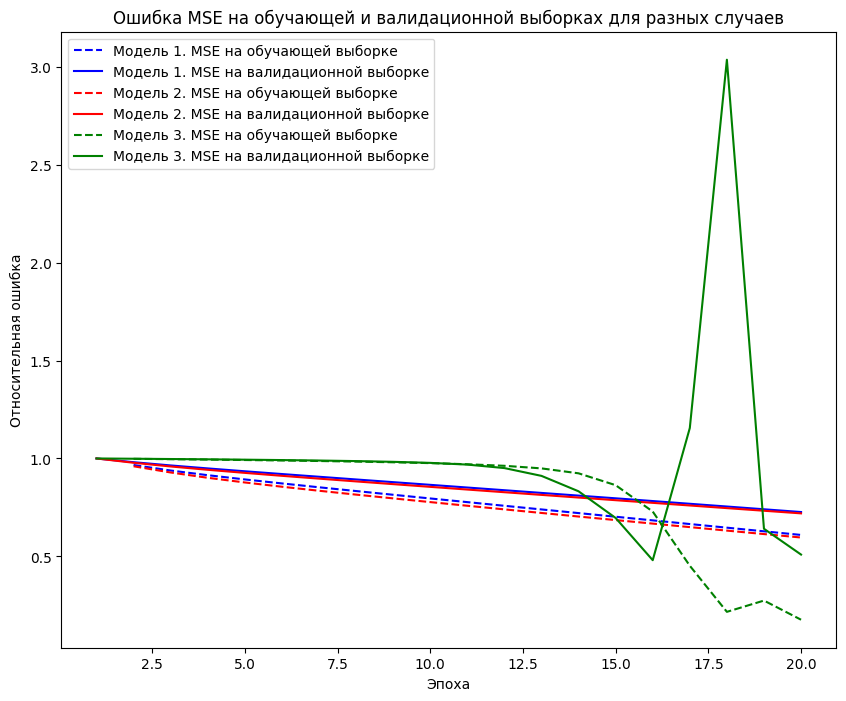

In [ ]:
loss1 = np.array(history1.history["mse"]) / history1.history["mse"][0]
val_loss1 = np.array(history1.history["val_mse"]) / history1.history["val_mse"][0]

loss2 = np.array(history2.history["mse"]) / history2.history["mse"][0]
val_loss2 = np.array(history2.history["val_mse"]) / history2.history["val_mse"][0]

loss3 = np.array(history3.history["mse"]) / history3.history["mse"][0]
val_loss3 = np.array(history3.history["val_mse"]) / history3.history["val_mse"][0]

epochs = range(1, len(loss1) + 1)
plt.figure(figsize=(10,8))
plt.plot(epochs[1:], loss1[1:], "b--", label="Модель 1. MSE на обучающей выборке")
plt.plot(epochs, val_loss1, "b", label="Модель 1. MSE на валидационной выборке")
plt.plot(epochs[1:], loss2[1:], "r--", label="Модель 2. MSE на обучающей выборке")
plt.plot(epochs, val_loss2, "r", label="Модель 2. MSE на валидационной выборке")
plt.plot(epochs[1:], loss3[1:], "g--", label="Модель 3. MSE на обучающей выборке")
plt.plot(epochs, val_loss3, "g", label="Модель 3. MSE на валидационной выборке")
plt.title("Ошибка MSE на обучающей и валидационной выборках для разных случаев")
plt.legend()
plt.xlabel('Эпоха')
plt.ylabel('Относительная ошибка')
plt.show()

**9.** Визуализируем весь набор данных и прогнозы трех построенных моделей для обучающей и тестовой выборок на одном рисунке:

In [ ]:
ds_data = data['Adj Close']

In [ ]:
look_back = 25

In [ ]:
def prepare_for_plot(model):
  trainPredict = model.predict(train_dataset)
  valPredict = model.predict(val_dataset)
  testPredict = model.predict(test_dataset)

  point1 = len(trainPredict) + look_back
  point2 = point1 + len(valPredict) + look_back + 12

  trainPredictPlot = ds_data.copy()
  trainPredictPlot[:] = np.nan
  trainPredictPlot[look_back:point1] = trainPredict.reshape(-1)

  valPredictPlot = ds_data.copy()
  valPredictPlot[:] = np.nan
  valPredictPlot[point1 + look_back + 12: point2] = valPredict.reshape(-1)

  testPredictPlot = ds_data.copy()
  testPredictPlot[:] = np.nan
  testPredictPlot[point2 + look_back + 12:point2 + look_back + len(testPredict) + 12] = testPredict.reshape(-1)

  return trainPredictPlot[:], valPredictPlot[:], testPredictPlot[:]


In [ ]:
print(test_dataset)

<_BatchDataset element_spec=(TensorSpec(shape=(None, None, 6), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


In [ ]:
trainPredictPlot, valPredictPlot, testPredictPlot = prepare_for_plot(model1)

print("Длина trainPredictPlot:", len(trainPredictPlot))
print("Длина valPredictPlot:", len(valPredictPlot))
print("Длина testPredictPlot:", len(testPredictPlot))


2/2 [==============================] - 0s 8ms/step
Длина trainPredictPlot: 502
Длина valPredictPlot: 502
Длина testPredictPlot: 502


In [ ]:
trainPredictPlot1, valPredictPlot1, testPredictPlot1 = prepare_for_plot(model1)
trainPredictPlot2, valPredictPlot2, testPredictPlot2 = prepare_for_plot(model2)
trainPredictPlot3, valPredictPlot3, testPredictPlot3 = prepare_for_plot(model3)

2/2 [==============================] - 0s 7ms/step


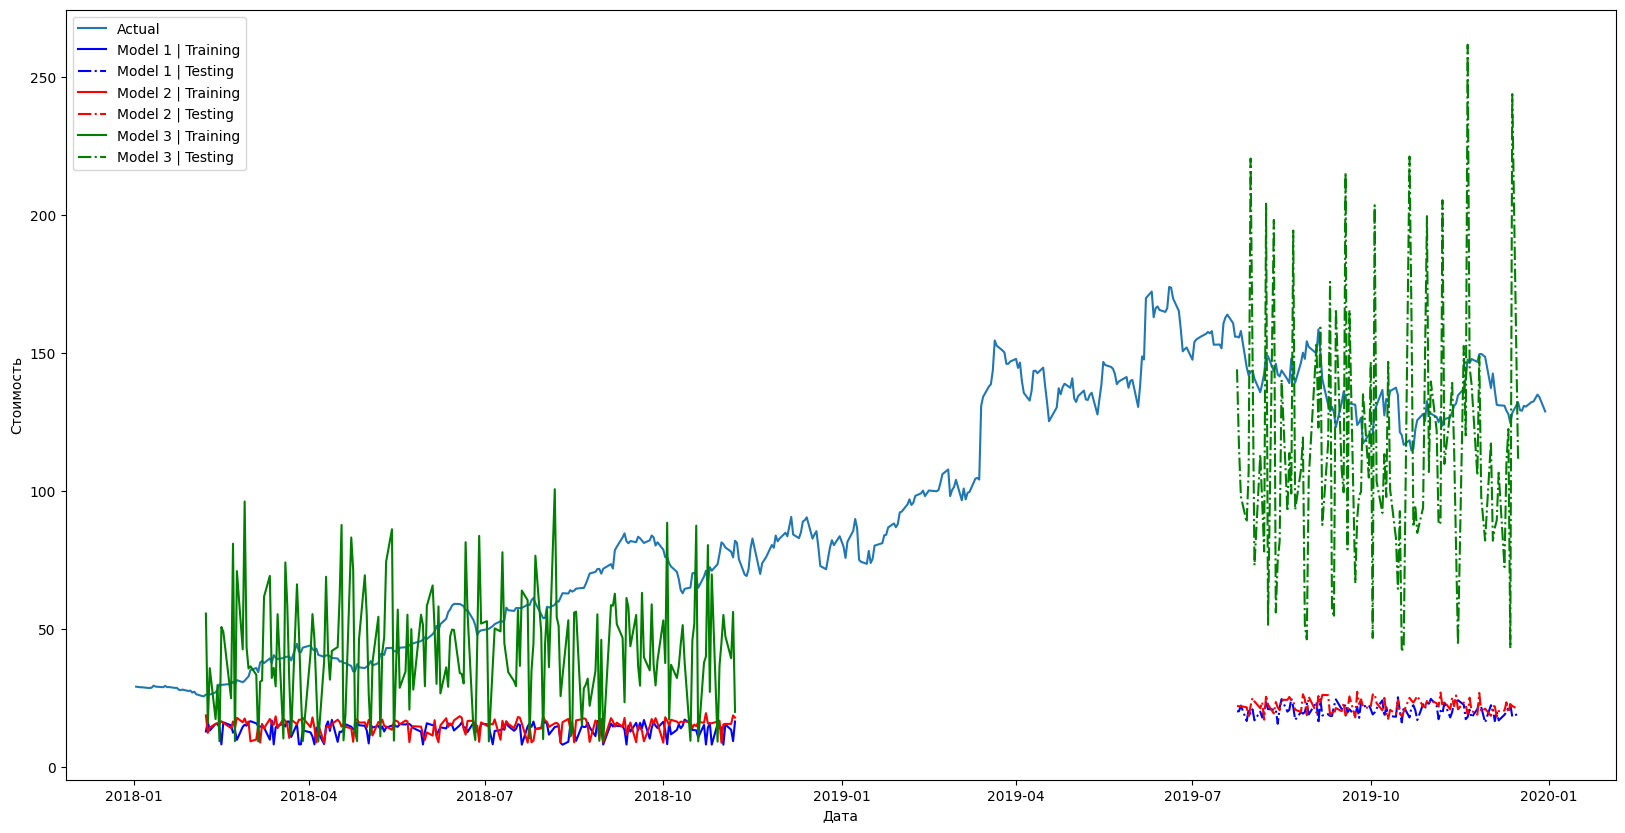

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(ds_data, label='Actual')
plt.plot(trainPredictPlot1, 'b', label='Model 1 | Training')
plt.plot(testPredictPlot1, 'b-.', label='Model 1 | Testing')
plt.plot(trainPredictPlot2, 'r', label='Model 2 | Training')
plt.plot(testPredictPlot2, 'r-.', label='Model 2 | Testing')
plt.plot(trainPredictPlot3, 'g', label='Model 3 | Training')
plt.plot(testPredictPlot3, 'g-.', label='Model 3 | Testing')
plt.xlabel('Дата')
plt.ylabel('Стоимость')
plt.legend();